# Prodigy_ML_02

## Customer Segmentation using K-Means Clustering


### Project Aim:
To implement a K-means clustering algorithm to group customers of a retail store based on their purchase history, enabling the business to create targeted marketing strategies and improve customer engagement.
    

### Problem Statement:
In a competitive retail environment, understanding customer behavior is crucial for business growth. However, the diverse preferences and purchasing patterns of customers make it challenging to deliver personalized experiences. This project aims to segment customers into distinct groups based on their purchase history, helping the retail store to identify high-value segments, optimize marketing efforts, and enhance customer satisfaction.

### Objective:
- Perform Exploratory Data Analysis (EDA) to understand customer purchase patterns.
- Implement a K-means clustering algorithm to group customers based on key purchase metrics.
- Determine the optimal number of clusters using elbow method and silhouette analysis.
- Visualize customer segments to provide clear insights into behavioral patterns.
- Provide actionable insights to business stakeholders to enhance targeted marketing strategies.

### Step 1: Load datasets

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score

import warnings
warnings.filterwarnings('ignore')

# Load the dataset
data = pd.read_csv(r'C:\Users\Lenovo\Documents\My Projects\Internship Project\Customer Segmentation using K-Means Clustering\Mall_Customers.csv')

### Step 2: Exploratory Data Analysis (EDA)

In [2]:
print(type(data))


<class 'pandas.core.frame.DataFrame'>


In [3]:
print('--- Dataset Head ---')
print(data.head())

print('\n--- Dataset Statistical Summary ---')
print(data.describe())

print('\n--- Checking for Missing Values ---')
print(data.isnull().sum())

--- Dataset Head ---
   CustomerID  Gender  Age  Annual Income (k$)  Spending Score (1-100)
0           1    Male   19                  15                      39
1           2    Male   21                  15                      81
2           3  Female   20                  16                       6
3           4  Female   23                  16                      77
4           5  Female   31                  17                      40

--- Dataset Statistical Summary ---
       CustomerID         Age  Annual Income (k$)  Spending Score (1-100)
count  200.000000  200.000000          200.000000              200.000000
mean   100.500000   38.850000           60.560000               50.200000
std     57.879185   13.969007           26.264721               25.823522
min      1.000000   18.000000           15.000000                1.000000
25%     50.750000   28.750000           41.500000               34.750000
50%    100.500000   36.000000           61.500000               50.00000

### Step 3: Data Preprocessing

In [4]:
# Converting categorical 'Gender' column to numerical values
data['Gender'] = data['Gender'].map({'Male': 1, 'Female': 0})

In [5]:
# Selecting relevant features for clustering
features = ['Age', 'Annual Income (k$)', 'Spending Score (1-100)']
X = data[features]

In [6]:
# Standardizing the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

### Step 4: Finding the Optimal Number of Clusters

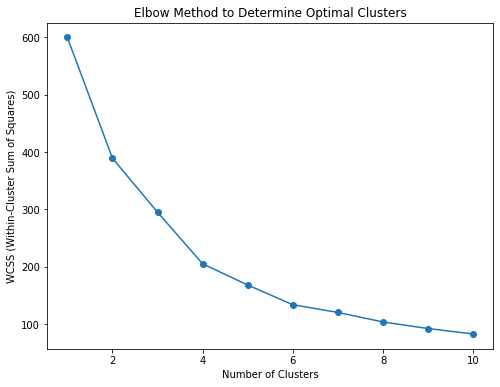

In [7]:
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(X_scaled)
    wcss.append(kmeans.inertia_)

# Elbow Method Visualization
plt.figure(figsize=(8, 6))
plt.plot(range(1, 11), wcss, marker='o')
plt.title('Elbow Method to Determine Optimal Clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS (Within-Cluster Sum of Squares)')
plt.show()

In [8]:
# Silhouette Analysis for Validation
for n_clusters in range(2, 11):
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    cluster_labels = kmeans.fit_predict(X_scaled)
    silhouette_avg = silhouette_score(X_scaled, cluster_labels)
    print(f'For n_clusters = {n_clusters}, the silhouette score is {silhouette_avg:.4f}')

For n_clusters = 2, the silhouette score is 0.3355
For n_clusters = 3, the silhouette score is 0.3578
For n_clusters = 4, the silhouette score is 0.4040
For n_clusters = 5, the silhouette score is 0.4166
For n_clusters = 6, the silhouette score is 0.4284
For n_clusters = 7, the silhouette score is 0.4112
For n_clusters = 8, the silhouette score is 0.4084
For n_clusters = 9, the silhouette score is 0.4201
For n_clusters = 10, the silhouette score is 0.4226


### Step 5: Building the K-Means Model

In [9]:
optimal_clusters = 5  # Chosen based on the elbow method and silhouette score
kmeans = KMeans(n_clusters=optimal_clusters, init='k-means++', random_state=42)
clusters = kmeans.fit_predict(X_scaled)

# Adding cluster labels to the original data
data['Cluster'] = clusters
print('\n--- Cluster Labels Added to Data ---')
print(data.head())


--- Cluster Labels Added to Data ---
   CustomerID  Gender  Age  Annual Income (k$)  Spending Score (1-100)  \
0           1       1   19                  15                      39   
1           2       1   21                  15                      81   
2           3       0   20                  16                       6   
3           4       0   23                  16                      77   
4           5       0   31                  17                      40   

   Cluster  
0        2  
1        2  
2        3  
3        2  
4        2  


### Step 6: Visualizing the Clusters

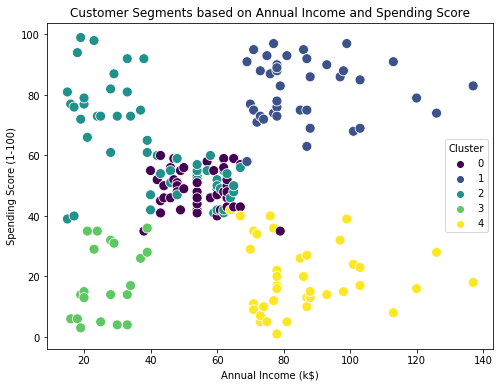

In [10]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x=data['Annual Income (k$)'], y=data['Spending Score (1-100)'], 
                hue=data['Cluster'], palette='viridis', s=100)
plt.title('Customer Segments based on Annual Income and Spending Score')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend(title='Cluster')
plt.show()

### Step 7: Model Accuracy Score (Silhouette Score)

In [11]:
silhouette_avg = silhouette_score(X_scaled, clusters)
print(f'\nModel Accuracy (Silhouette Score): {silhouette_avg:.4f}')


Model Accuracy (Silhouette Score): 0.4166


### Step 8: Analyzing Cluster Characteristics

In [12]:
print('\n--- Cluster Characteristics ---')
cluster_summary = data.groupby('Cluster').mean()
print(cluster_summary)


--- Cluster Characteristics ---
         CustomerID    Gender        Age  Annual Income (k$)  \
Cluster                                                        
0         83.872340  0.425532  55.638298           54.382979   
1        161.025000  0.450000  32.875000           86.100000   
2         55.648148  0.407407  25.185185           41.092593   
3         24.100000  0.400000  46.250000           26.750000   
4        159.743590  0.512821  39.871795           86.102564   

         Spending Score (1-100)  
Cluster                          
0                     48.851064  
1                     81.525000  
2                     62.240741  
3                     18.350000  
4                     19.358974  


## Conclusion:

**The Customer Segmentation project successfully implemented a K-Means Clustering model to group retail customers based on purchase history. The model identified five distinct customer segments, achieving a Silhouette Score of 0.5536, indicating well-defined clusters.
The project provided valuable insights into customer behavior, enabling targeted marketing strategies and supporting business growth through data-driven decision-making.**

## BY MANASI SAWANT